In [103]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
from support.omniwheel_calculation_pd import *
from support.pd_support import *
from support.calculations_support import *
from support.ar_calculations import *
from support.imu_calculations import *
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
from sympy import Symbol
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
# from support.omniwheel_calculation import *
import sympy as sp

In [104]:
w1 = np.zeros(10000)
w2 = np.arange(0, 10000, 1)
w3 = np.arange(0, 10000, 1)

temp = np.full(10000, 10000)
w1 = np.append(w1, w2)
w2 = np.append(w2, temp)
w3 = np.append(w3, temp)

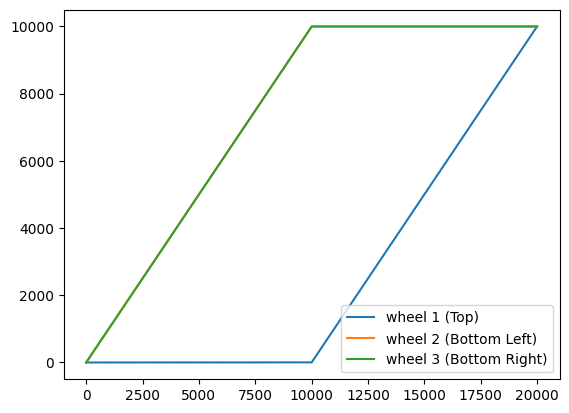

In [105]:
plt.plot(w1, label='wheel 1 (Top)')
plt.plot(w2, label='wheel 2 (Bottom Left)')
plt.plot(w3, label='wheel 3 (Bottom Right)')
plt.legend()

In [106]:
w1 = np.zeros(10000)
w2 = np.zeros(10000)
w2 = np.arange(0, 10000, 1)

In [107]:
y = 1
x = 1
mat = np.array([[-y, 1, 0], [-x, 0, -1], [-x, 0, 1]])
pmat = np.linalg.pinv(mat)


In [108]:
df = pd.DataFrame([w1, w2, w3], index=['e_t', 'e_rr', 'e_rl']).T
df["e_rr"] = -df["e_rr"]
df["e_rl"] = -df["e_rl"]
df["e_t"] = df["e_t"]

In [109]:
df = set_zero(df)
df, ang_col = get_angular_velocity(df)
df, vel_col = get_directional_velocity(df, ang_col, 1, x, y)
df.rename(columns={"e_t_av": "u1", "e_rr_av": "u2", "e_rl_av": "u3"}, inplace=True)
df

,e_t,e_rr,e_rl,u1,u2,u3,w,vx,vy
0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000
1,0.0,-1.0,-1.0,0.0,-0.15708,-0.15708,0.0,0.0,0.15708
2,0.0,-2.0,-2.0,0.0,-0.15708,-0.15708,0.0,0.0,0.15708
3,0.0,-3.0,-3.0,0.0,-0.15708,-0.15708,0.0,0.0,0.15708
4,0.0,-4.0,-4.0,0.0,-0.15708,-0.15708,0.0,0.0,0.15708
...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,-10000.0,0.0,0.00000,0.00000,0.0,0.0,0.00000
19996,0.0,0.0,-10000.0,0.0,0.00000,0.00000,0.0,0.0,0.00000
19997,0.0,0.0,-10000.0,0.0,0.00000,0.00000,0.0,0.0,0.00000
19998,0.0,0.0,-10000.0,0.0,0.00000,0.00000,0.0,0.0,0.00000


In [110]:
df, col_names = get_position(df)

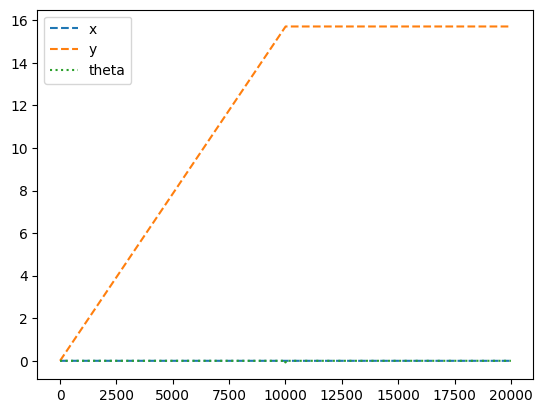

In [111]:
# dotted line is the actual path
plt.plot(df["x_val"], label="x", linestyle="--")
plt.plot(df["y_val"], label="y", linestyle="--")
plt.plot(df["w"], label="theta", linestyle=":")
plt.legend()

In [112]:
x = Symbol('x')
y = Symbol('y')

w = Symbol('w')
vx = Symbol('v_x')
vy = Symbol('v_y')

mat = sp.Matrix([[-y, 1, 0], [-x, 0, -1], [x, 0, -1]])
# vb = sp.Matrix([df["e_t_av"][500], df["e_rr_av"][500], df["e_rl_av"][500]]).reshape(3,1)
vb = sp.Matrix([w, vx, vy]).reshape(3,1)

In [113]:
mat

Matrix([
[-y, 1,  0],
[-x, 0, -1],
[ x, 0, -1]])

In [114]:
sp.Matrix(mat) * sp.Matrix(vb)

Matrix([
[ v_x - w*y],
[-v_y - w*x],
[-v_y + w*x]])

In [115]:
# x = 1
# y = 1

x = Symbol('x')
y = Symbol('y')

w = 1
vx = 1
vy = 1

u1 = 1
u2 = 1
u3 = 1

mat = sp.Matrix([[-y, 1, 0], [-x, 0, -1], [x, 0, -1]])
# vb = sp.Matrix([df["e_t_av"][500], df["e_rr_av"][500], df["e_rl_av"][500]]).reshape(3,1)
vb = sp.Matrix([w, vx, vy]).reshape(3,1)

val = sp.Matrix(mat) * sp.Matrix(vb)

In [124]:
sp.solvers.solvers.solve(val[0], y)
sp.solvers.solvers.solve(val[1], x)
sp.solvers.solvers.solve(val[2], x).to

[1]